# Project on Diabetes with Decision Tree

In [1]:
#import libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

In [3]:
#import dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [4]:
#checking the data details
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
#checking the data deetails
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [6]:
#checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


#we can interperate all the d_types are correct and we don't need to make the changes.

In [7]:
#let's check for the duplicate values.
df.duplicated().sum()

3854

#we can interperate we have duplicate values in the dataset.

In [8]:
#let's find the shape of the dataset
df.shape

(100000, 9)

In [9]:
#let's remove the duplicate.
df= df.drop_duplicates()

In [10]:
#let's check the shape of the data set after dropping the duplicates.
df.shape

(96146, 9)

In [11]:
#checking for the null values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

#we can interperate there are no null values in the dataset

In [12]:
#let's find the stats of the dataset
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [13]:
#checking colums of the dataset
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

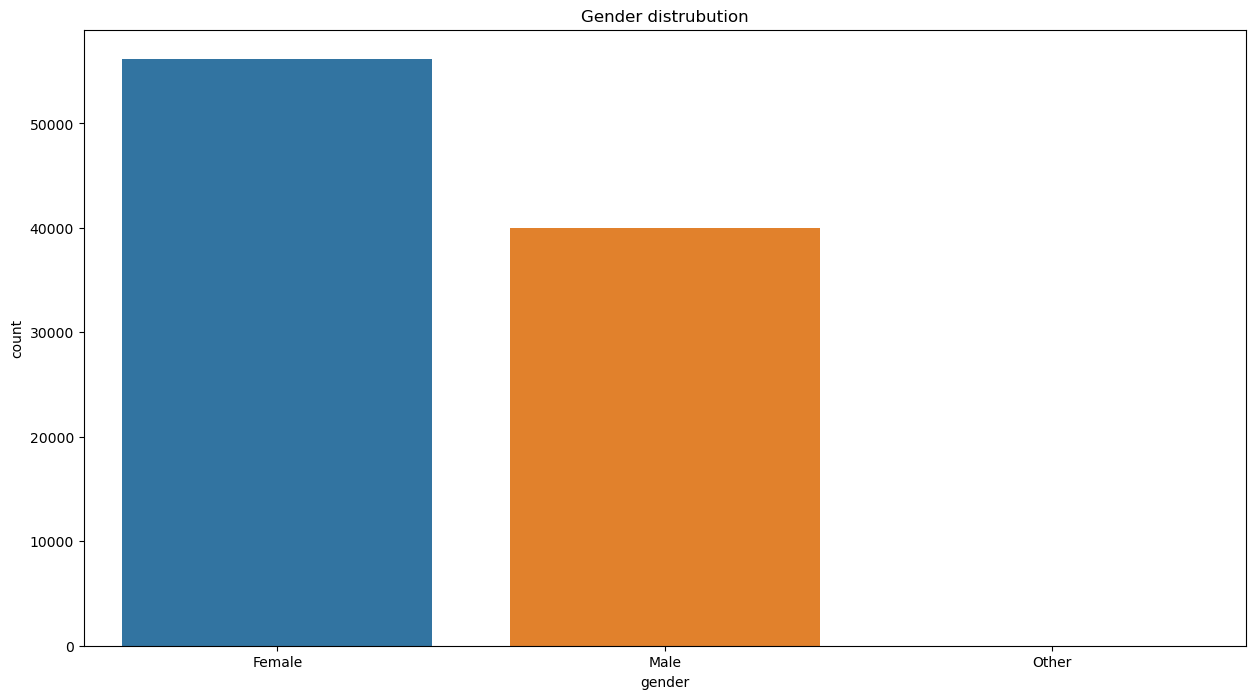

In [14]:
#let's visulaize the colums details.
sns.countplot(x="gender", data=df)
plt.title("Gender distrubution")
plt.show()

In [15]:
#we can interperate we have other in the gender so let's remove it.
df = df[df['gender']!= 'Other']

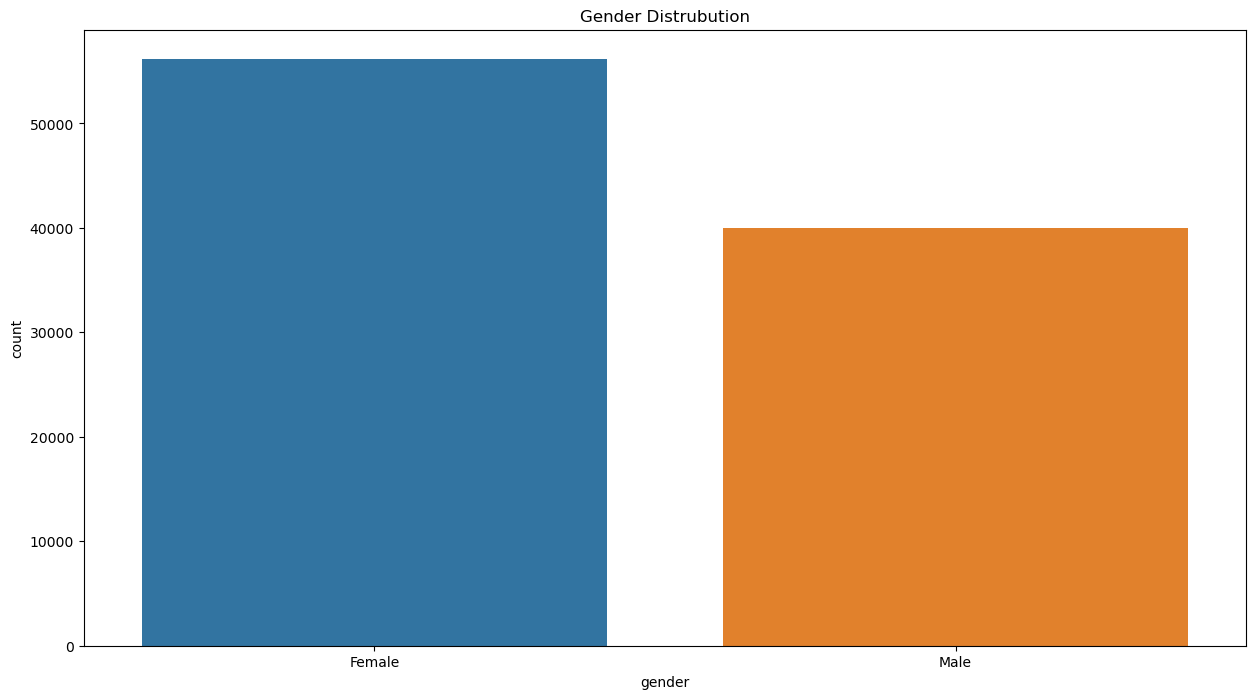

In [16]:
#let's visualize the same dataset
sns.countplot(x='gender', data=df)
plt.title("Gender Distrubution")
plt.show()

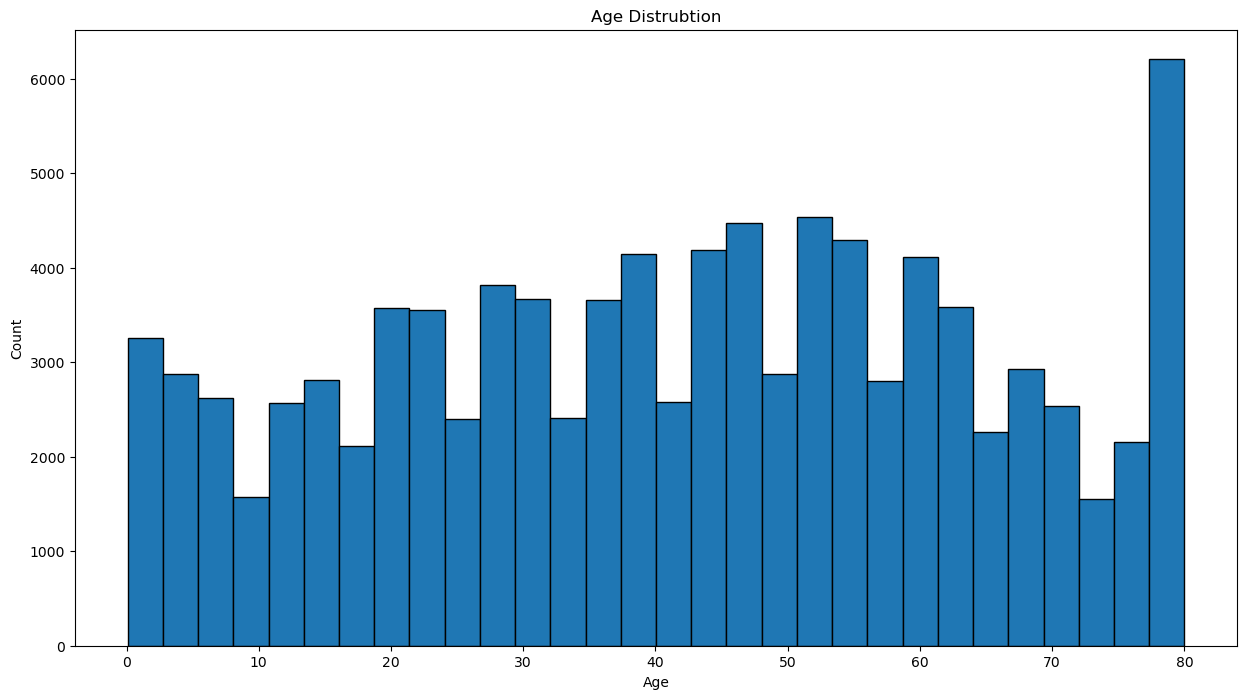

In [17]:
#let's visualise age distrubution
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title("Age Distrubtion")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

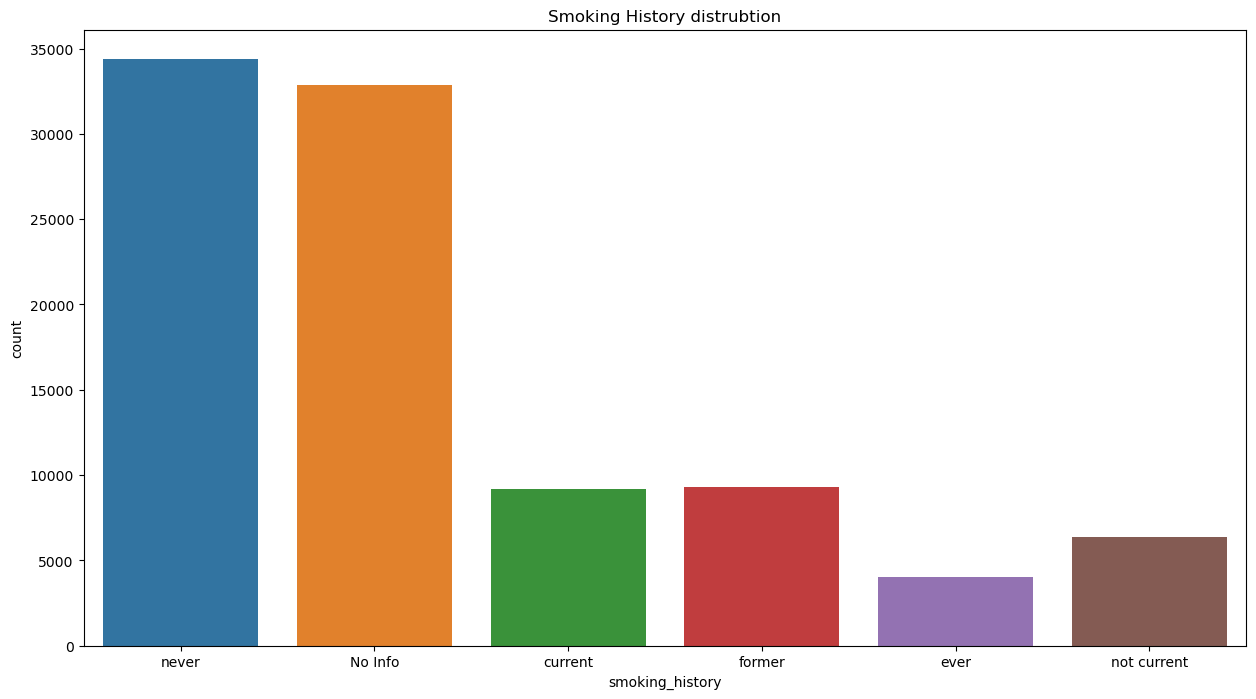

In [18]:
#visualizing smoking_hisotry
sns.countplot(x='smoking_history', data=df)
plt.title("Smoking History distrubtion")
plt.show()

In [19]:
#let's define a class to group them in "past smoker", "current smoker" and "no smoker"
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No info']:
        return 'No-smoker'
    if smoking_status == 'current':
        return 'current'
    if smoking_status in ['former', 'ever', 'not current']:
        return 'Past-smoker'

#applying the fuction to the smoking_history
df['smoking_history'] = df['smoking_history'].apply(recategorize_smoking)

#let's find the value count of the new group
df['smoking_history'].value_counts()

No-smoker      34395
Past-smoker    19655
current         9197
Name: smoking_history, dtype: int64

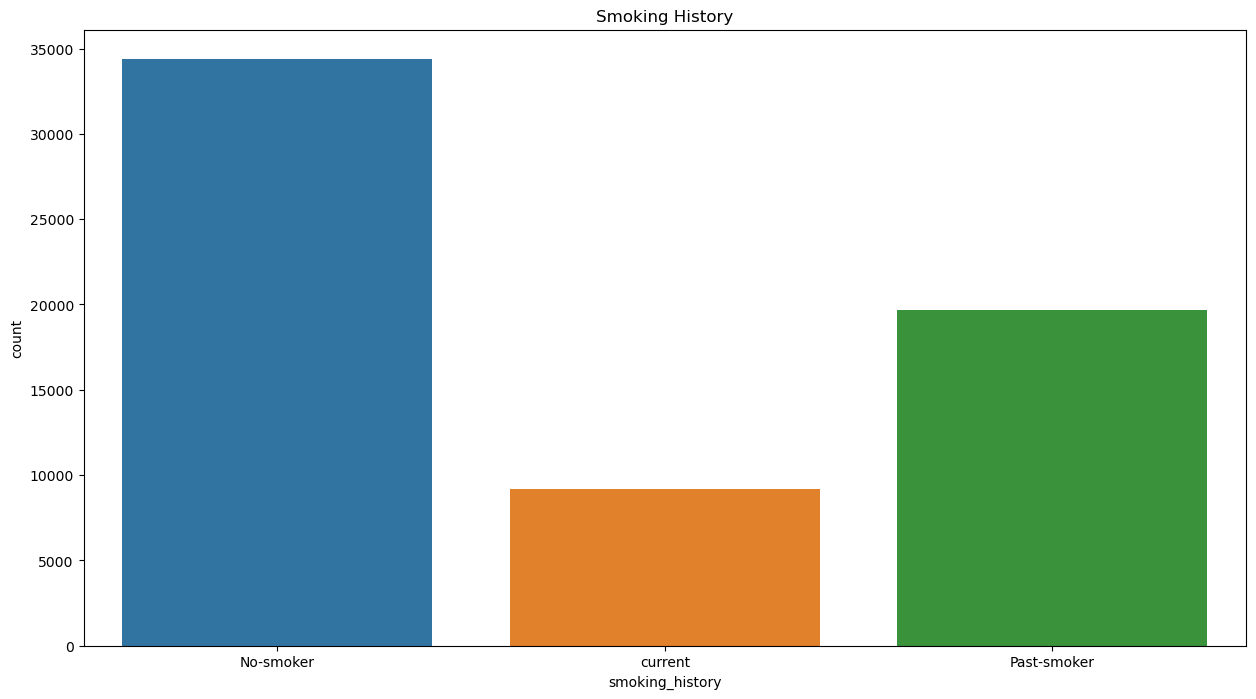

In [20]:
#let's visualize it
sns.countplot(x= 'smoking_history', data =df)
plt.title("Smoking History")
plt.show()

hypertension Distriubtion


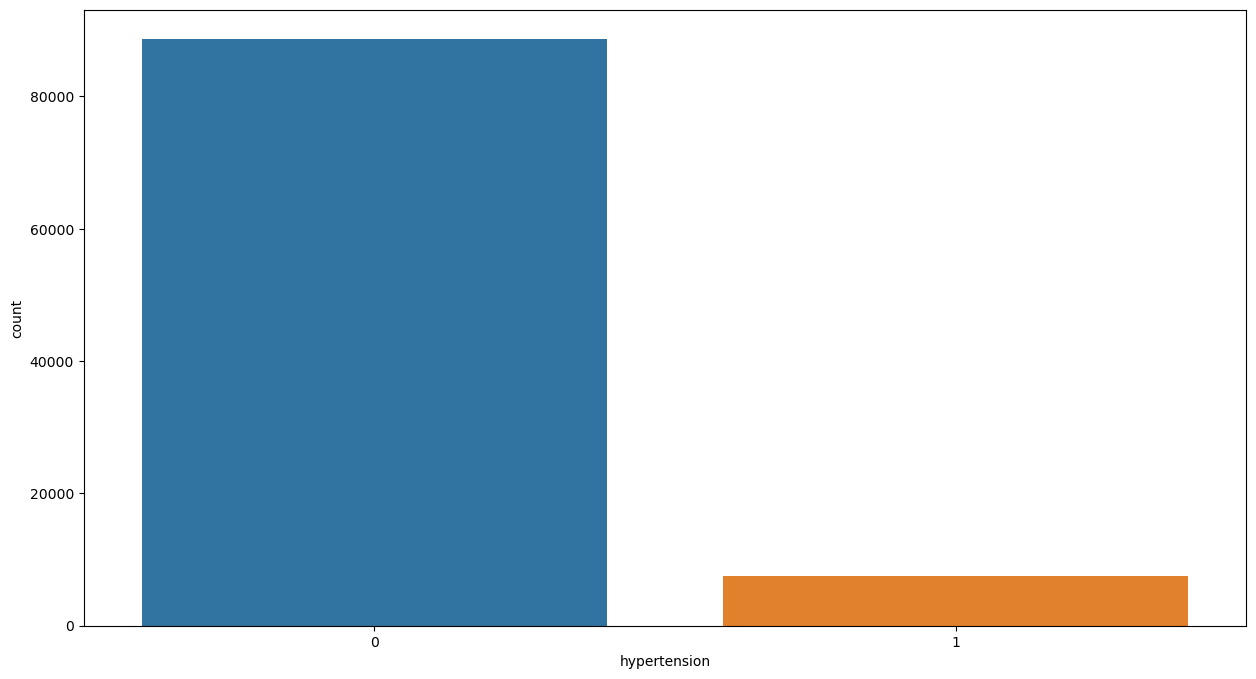

heart_disease Distriubtion


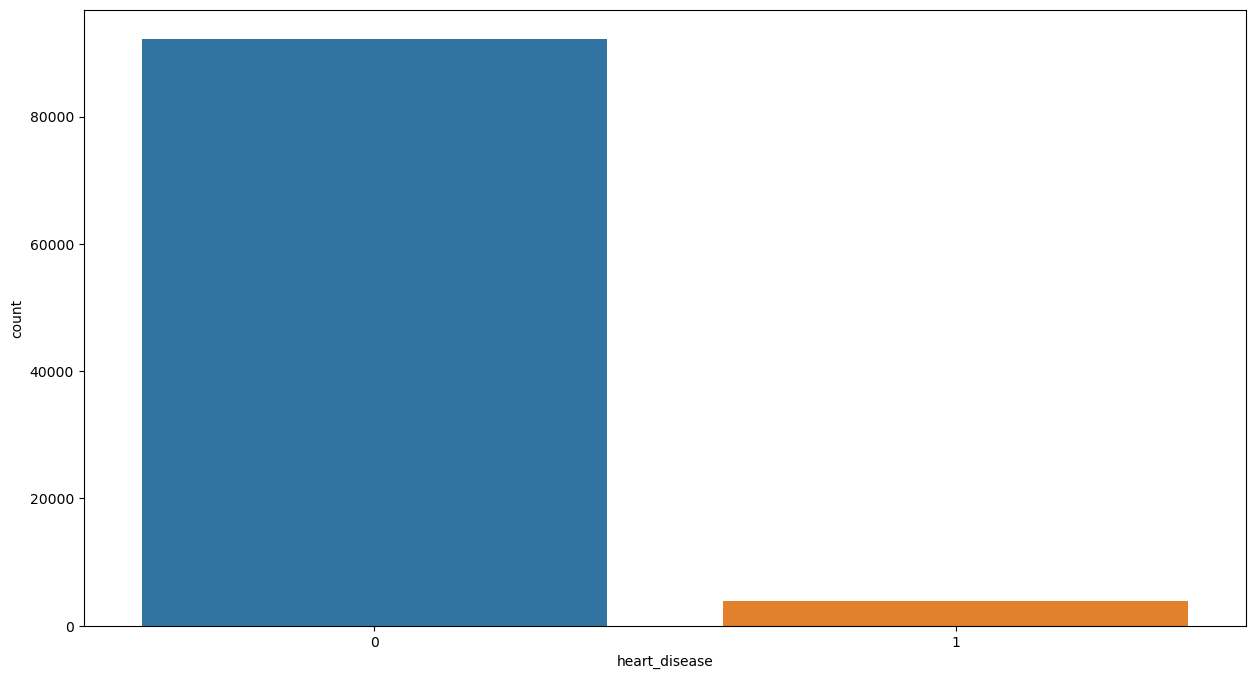

diabetes Distriubtion


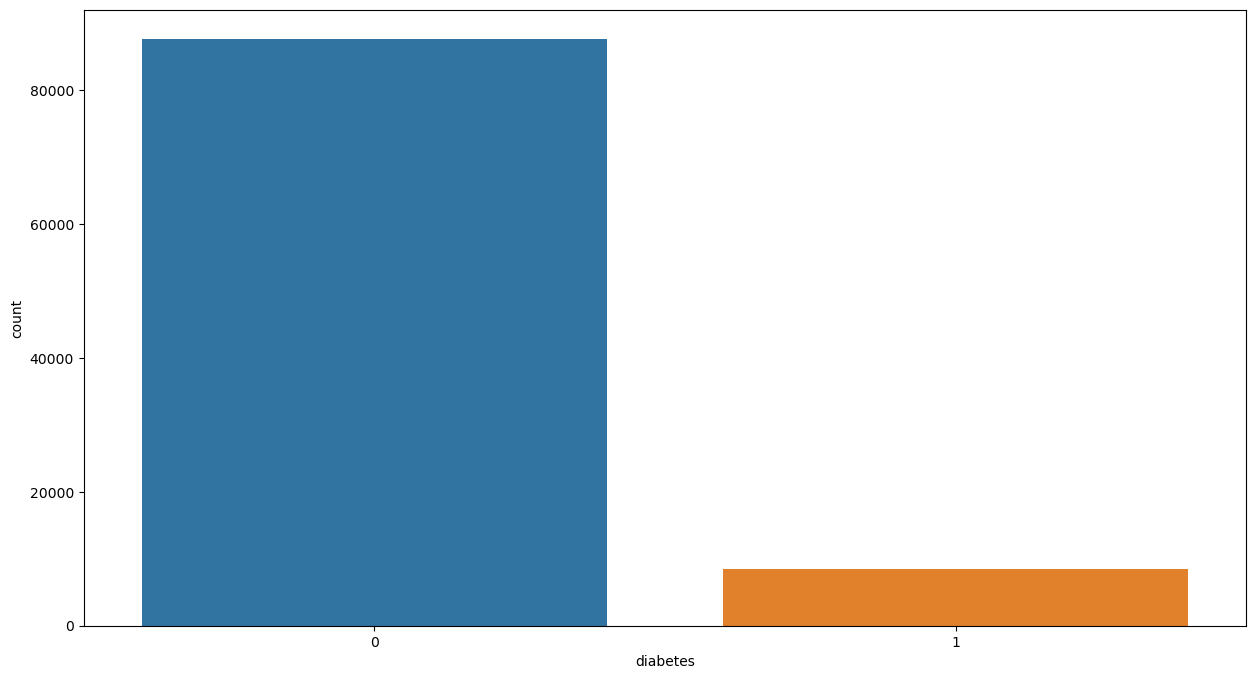

In [21]:
for col in ['hypertension', 'heart_disease', 'diabetes']:
    sns.countplot(x=col, data=df)
    print(f'{col} Distriubtion')
    plt.show()

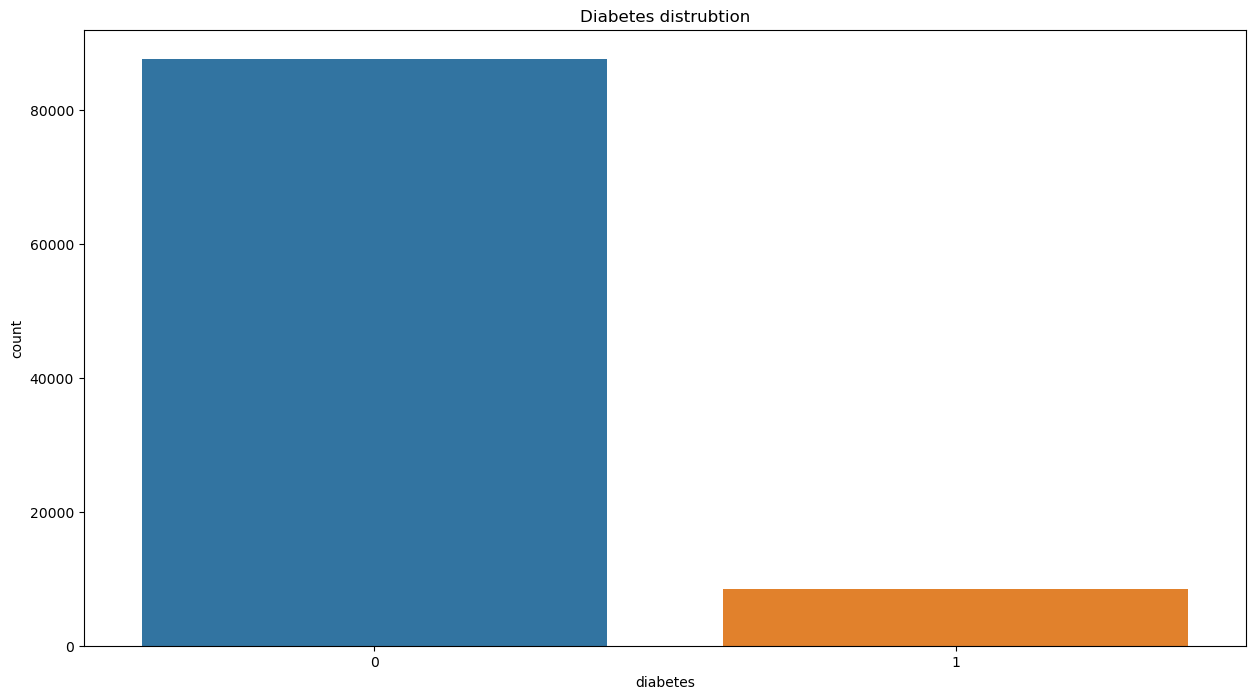

In [22]:
sns.countplot(x="diabetes", data=df)
plt.title("Diabetes distrubtion")
plt.show()

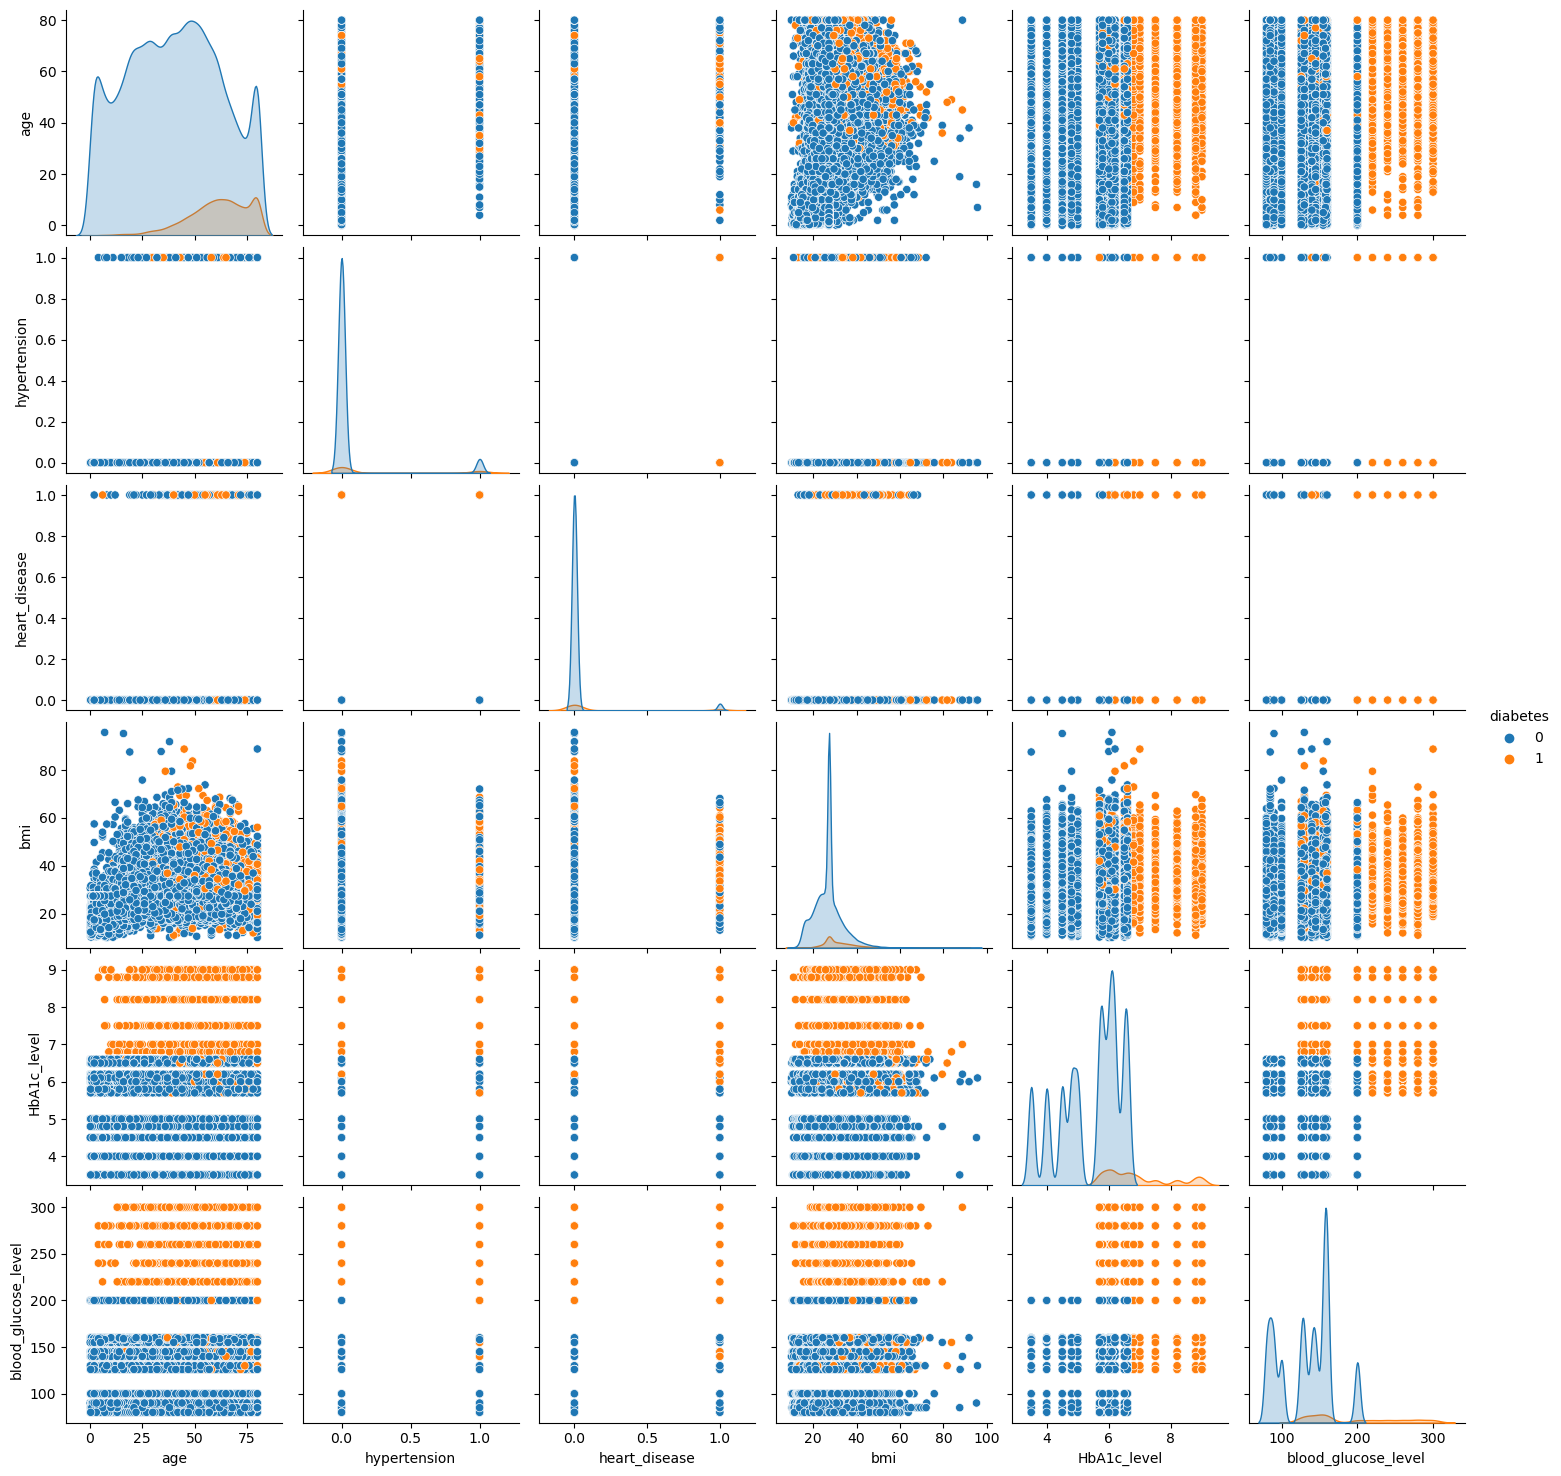

In [23]:
sns.pairplot(df, hue='diabetes')

In [24]:
df.corr()

/var/folders/5y/fdpz56f55cb6jc5jsgbq17140000gn/T/ipykernel_15455/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.257297,0.238449,0.344779,0.106708,0.114323,0.264918
hypertension,0.257297,1.000000,0.119972,0.148124,0.081443,0.084841,0.195696
heart_disease,0.238449,0.119972,1.000000,0.061382,0.068142,0.070838,0.170701
bmi,0.344779,0.148124,0.061382,1.000000,0.084443,0.092593,0.214951
HbA1c_level,0.106708,0.081443,0.068142,0.084443,1.000000,0.171717,0.406446
blood_glucose_level,0.114323,0.084841,0.070838,0.092593,0.171717,1.000000,0.424366
diabetes,0.264918,0.195696,0.170701,0.214951,0.406446,0.424366,1.000000


In [25]:
df.skew()

/var/folders/5y/fdpz56f55cb6jc5jsgbq17140000gn/T/ipykernel_15455/1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


age                   -0.062585
hypertension           3.157297
heart_disease          4.641865
bmi                    1.023945
HbA1c_level           -0.054330
blood_glucose_level    0.836615
diabetes               2.903483
dtype: float64

/var/folders/5y/fdpz56f55cb6jc5jsgbq17140000gn/T/ipykernel_15455/299865538.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], kde= 'True', bins=20)


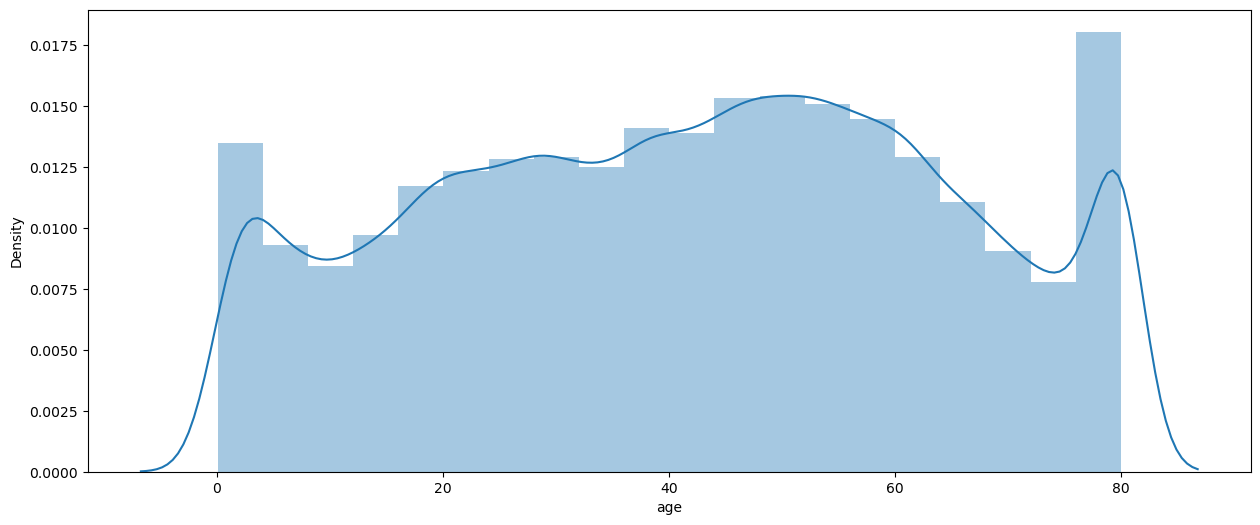

/var/folders/5y/fdpz56f55cb6jc5jsgbq17140000gn/T/ipykernel_15455/299865538.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], kde= 'True', bins=20)


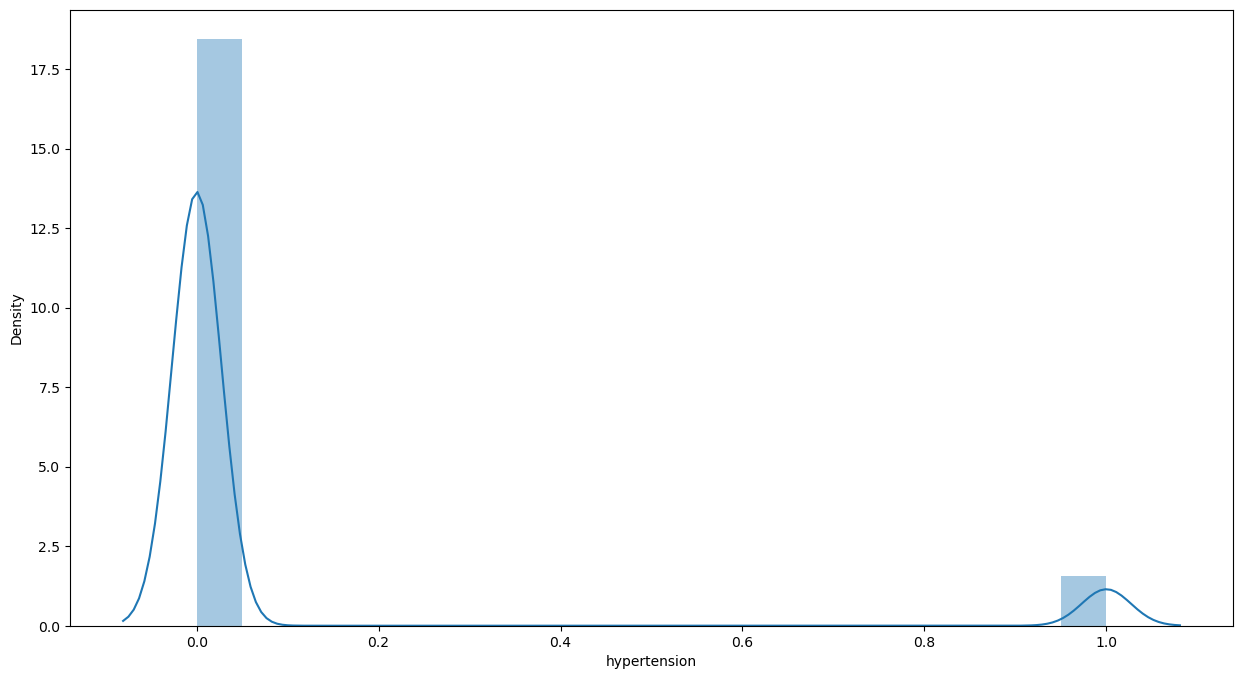

/var/folders/5y/fdpz56f55cb6jc5jsgbq17140000gn/T/ipykernel_15455/299865538.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], kde= 'True', bins=20)


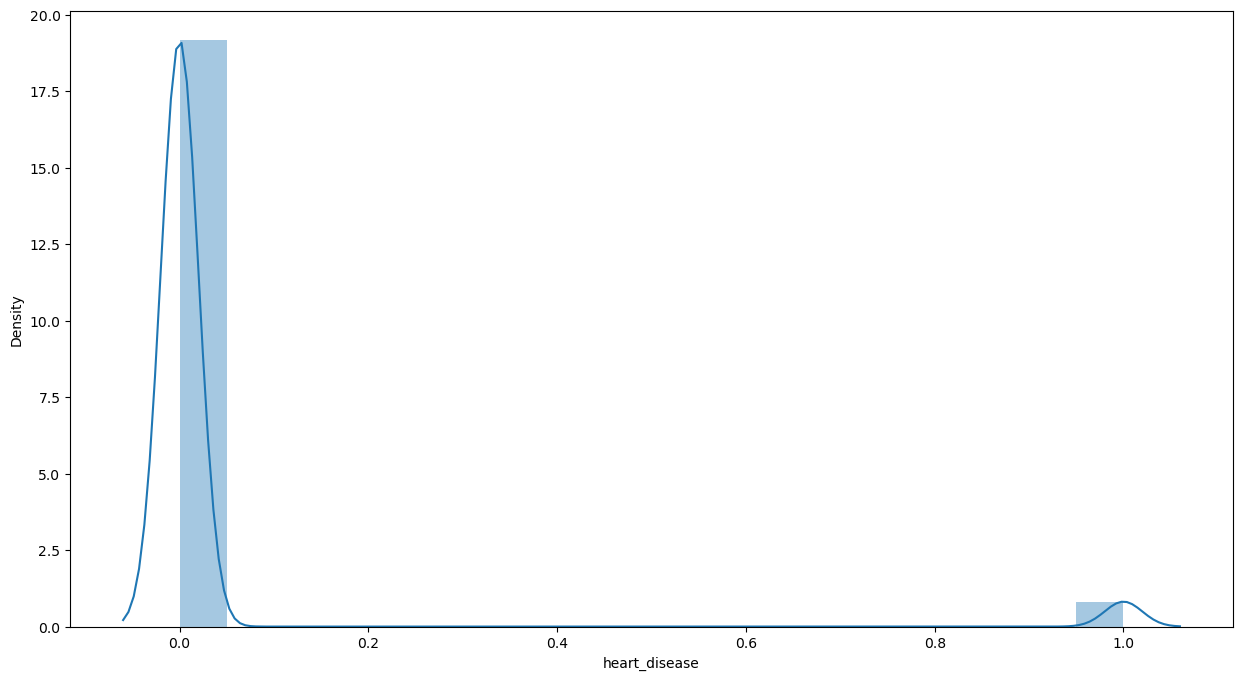

/var/folders/5y/fdpz56f55cb6jc5jsgbq17140000gn/T/ipykernel_15455/299865538.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], kde= 'True', bins=20)


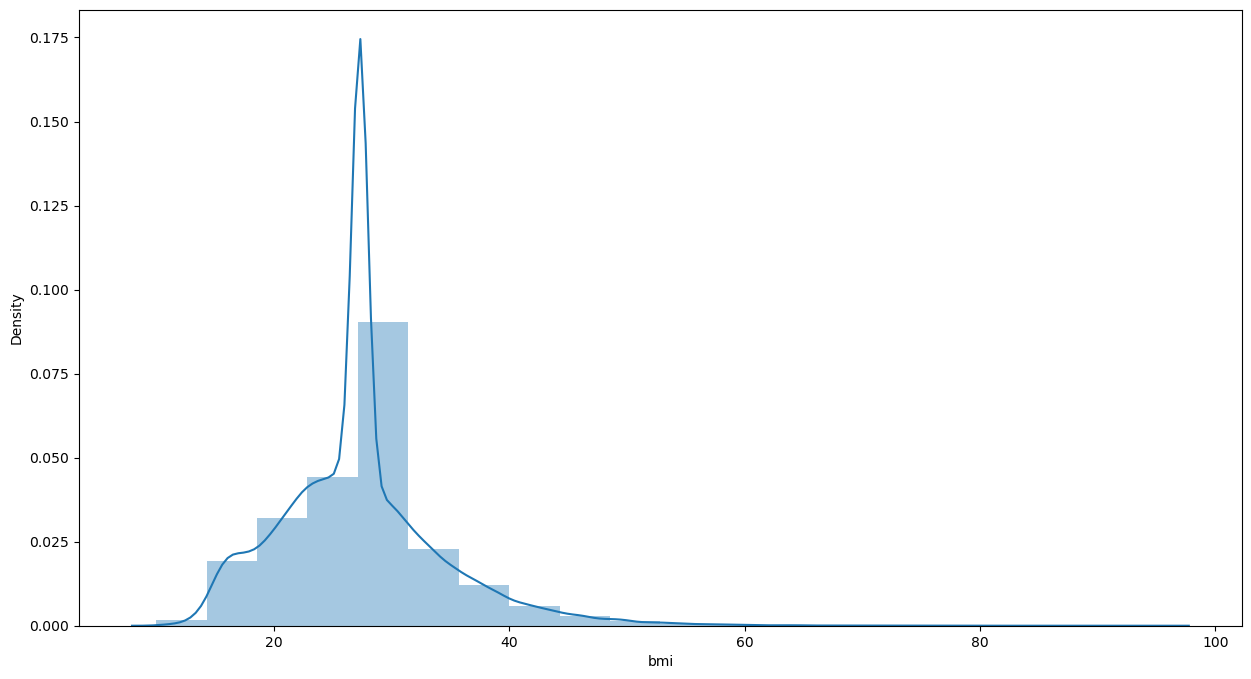

/var/folders/5y/fdpz56f55cb6jc5jsgbq17140000gn/T/ipykernel_15455/299865538.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], kde= 'True', bins=20)


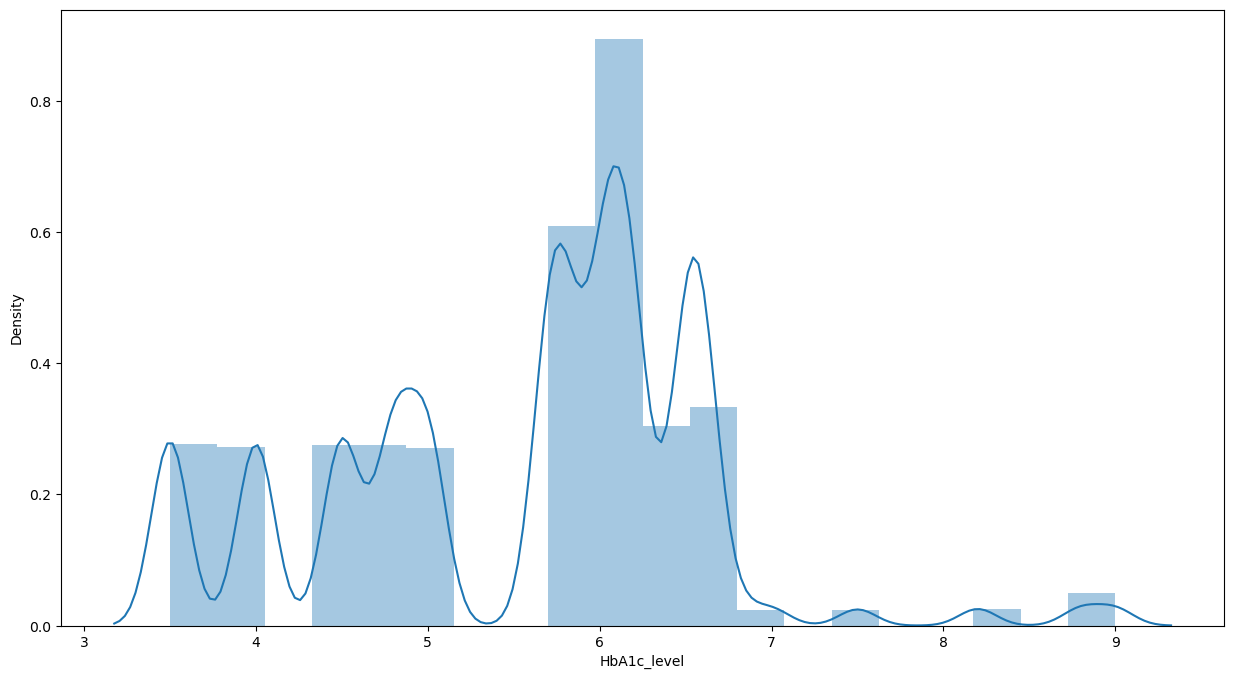

/var/folders/5y/fdpz56f55cb6jc5jsgbq17140000gn/T/ipykernel_15455/299865538.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], kde= 'True', bins=20)


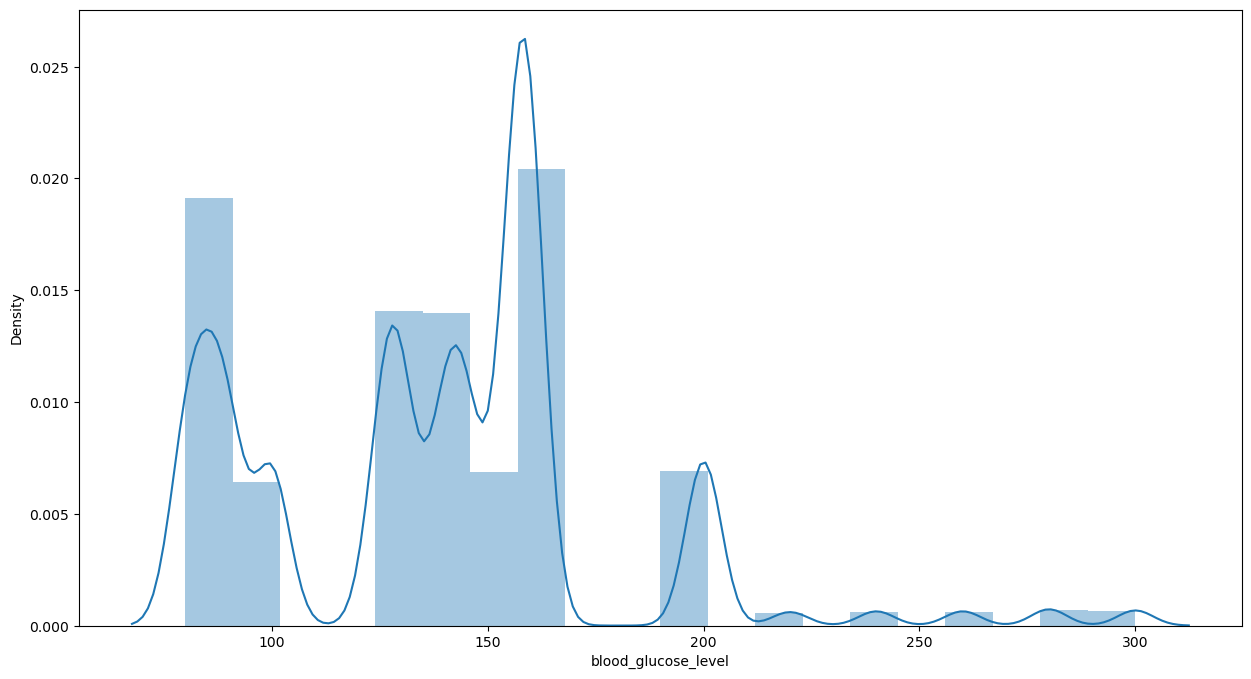

/var/folders/5y/fdpz56f55cb6jc5jsgbq17140000gn/T/ipykernel_15455/299865538.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], kde= 'True', bins=20)


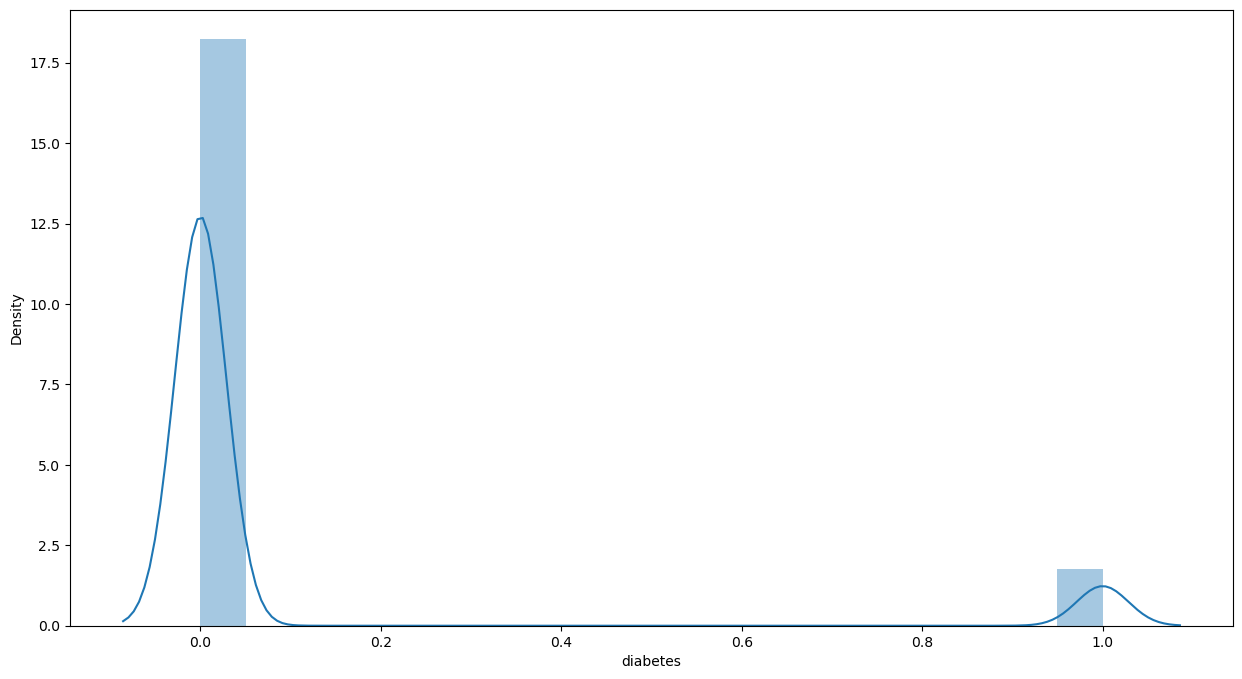

In [26]:
df_num = df.select_dtypes(include = [np.number])

plt.figure(figsize=(15,6))

for i in df_num:
    sns.distplot(df[i], kde= 'True', bins=20)
    plt.show()

/var/folders/5y/fdpz56f55cb6jc5jsgbq17140000gn/T/ipykernel_15455/1272071607.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,cmap='RdYlGn', vmax = 1.0, vmin= -1.0)


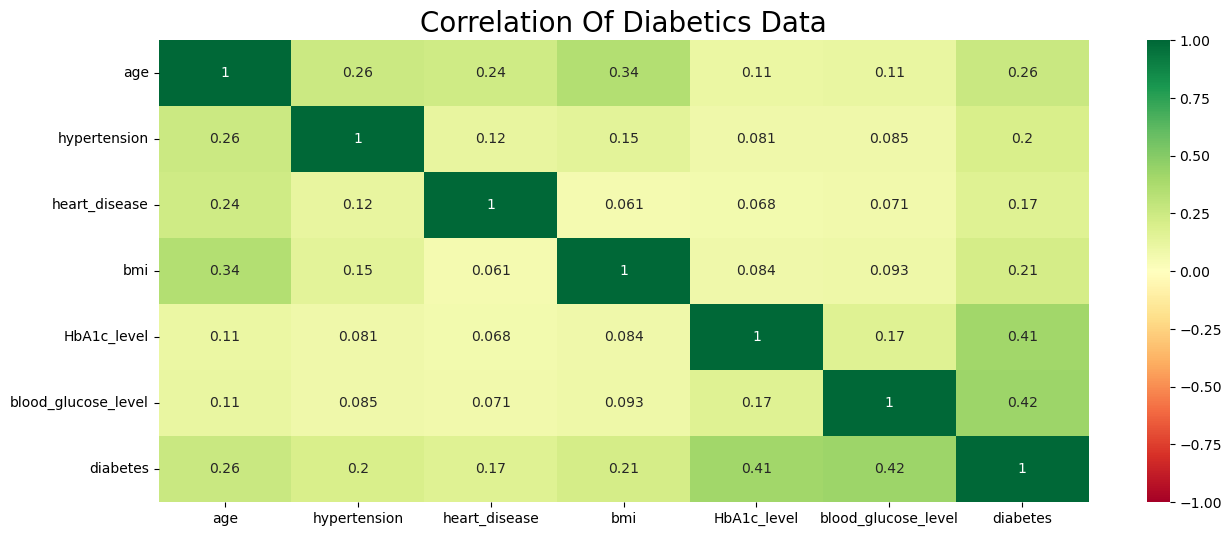

In [27]:
plt.figure(figsize=(15,6))
plt.title('Correlation Of Diabetics Data',fontsize=20)
sns.heatmap(df.corr(), annot=True,cmap='RdYlGn', vmax = 1.0, vmin= -1.0)
plt.show()

In [28]:
#let's encode the categorical variable
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder

le = LabelEncoder()

In [29]:
cols = ['gender', 'smoking_history']

# Encode labels of multiple columns at once

df[cols] = df[cols].apply(LabelEncoder().fit_transform)

# Print head
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,3,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0


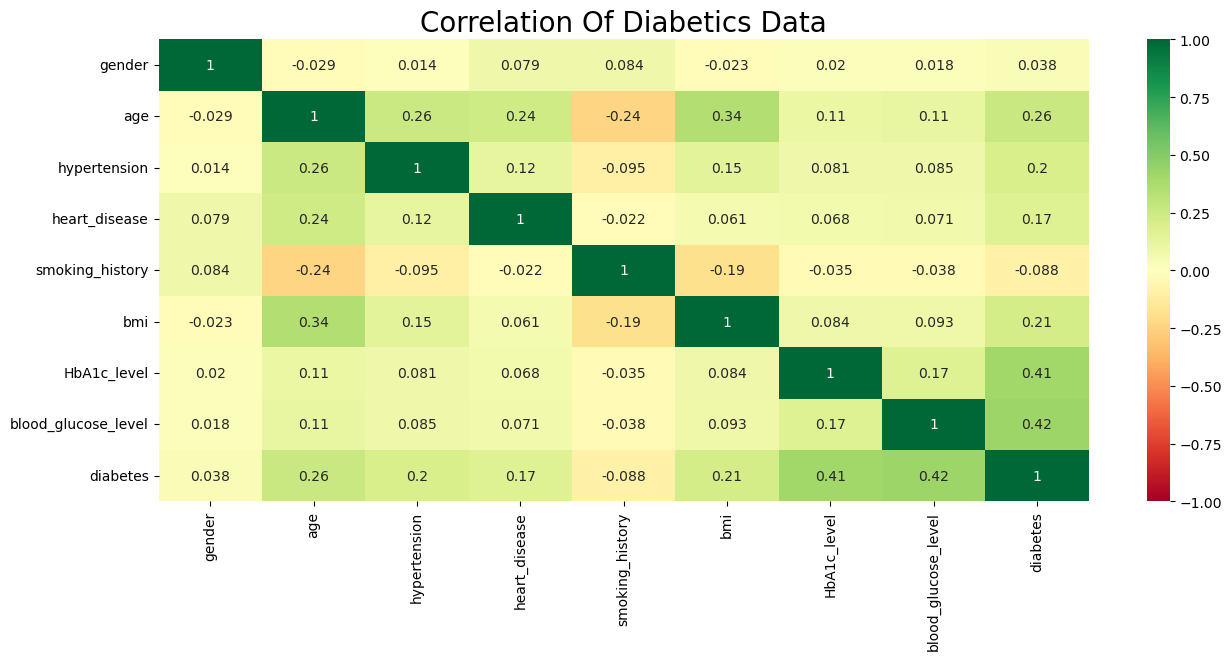

In [30]:
#let's find all the correlcation for numberical columns
plt.figure(figsize=(15,6))
plt.title('Correlation Of Diabetics Data',fontsize=20)
sns.heatmap(df.corr(), annot=True,cmap='RdYlGn', vmax = 1.0, vmin= -1.0)
plt.show()

In [31]:
df.corr()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.028670,0.014196,0.078512,0.083780,-0.023490,0.019928,0.017831,0.037837
age,-0.028670,1.000000,0.257297,0.238449,-0.235927,0.344779,0.106708,0.114323,0.264918
hypertension,0.014196,0.257297,1.000000,0.119972,-0.094872,0.148124,0.081443,0.084841,0.195696
heart_disease,0.078512,0.238449,0.119972,1.000000,-0.021672,0.061382,0.068142,0.070838,0.170701
smoking_history,0.083780,-0.235927,-0.094872,-0.021672,1.000000,-0.190341,-0.034730,-0.038243,-0.088061
bmi,-0.023490,0.344779,0.148124,0.061382,-0.190341,1.000000,0.084443,0.092593,0.214951
HbA1c_level,0.019928,0.106708,0.081443,0.068142,-0.034730,0.084443,1.000000,0.171717,0.406446
blood_glucose_level,0.017831,0.114323,0.084841,0.070838,-0.038243,0.092593,0.171717,1.000000,0.424366
diabetes,0.037837,0.264918,0.195696,0.170701,-0.088061,0.214951,0.406446,0.424366,1.000000


In [32]:
#now let's split the tager and independent variables. 
X = df.drop("diabetes",axis=1)
y = df["diabetes"]

In [33]:
# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import function to perform feature selection
from sklearn.feature_selection import RFE

In [34]:
#let's split the data in train, test split
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set

X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=10, test_size=0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (67289, 8)
y_train (67289,)
X_test (28839, 8)
y_test (28839,)


In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
#let's scale the dataset using minmax scaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [37]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,0,25.19,6.6,140
1,0,54.0,0,0,3,27.32,6.6,80
2,1,28.0,0,0,0,27.32,5.7,158
3,0,36.0,0,0,2,23.45,5.0,155
4,1,76.0,1,1,2,20.14,4.8,155


In [39]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [40]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, fbeta_score, accuracy_score

In [41]:
# Undersampling will be utilized to address the issue of imbalanced classes.

# Instantiate RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Undersample the training set
X_train, y_train = rus.fit_resample(X_train, y_train)

In [42]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.296226
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                96128
Model:                          Logit   Df Residuals:                    96120
Method:                           MLE   Df Model:                            7
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                0.007414
Time:                        20:44:41   Log-Likelihood:                -28476.
converged:                       True   LL-Null:                       -28688.
Covariance Type:            nonrobust   LLR p-value:                 8.430e-88
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
gender                 -0.1447      0.023     -6.307      0.000      -0.190      -0.100
ag

In [43]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/rahul/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

# Accuracy on Train
print("The Training Accuracy is: ", logreg.score(X_train, y_train))

Accuracy of logistic regression classifier on test set: 0.86
The Training Accuracy is:  0.8609417344173442


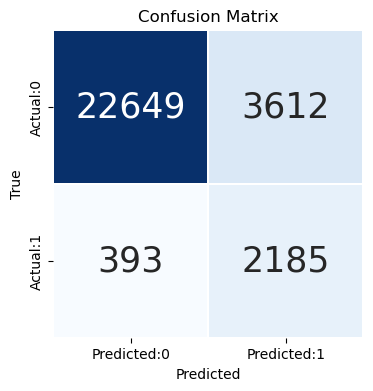

In [45]:
# Plot confusion matrix

cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap='Blues', cbar = False, linewidths = 0.1, annot_kws = {'size':25})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [46]:
# Evaluate the model
print("Model Accuracy: ", accuracy_score(y_test, y_pred)*100)
print(classification_report(y_test, y_pred))

Model Accuracy:  86.11255591386664
              precision    recall  f1-score   support

           0       0.98      0.86      0.92     26261
           1       0.38      0.85      0.52      2578

    accuracy                           0.86     28839
   macro avg       0.68      0.86      0.72     28839
weighted avg       0.93      0.86      0.88     28839



In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dt = DecisionTreeClassifier()

In [49]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [50]:
y_pred = dt.predict(X_test)

In [51]:
# Evaluate the model
print("Model Accuracy: ", accuracy_score(y_test, y_pred)*100)
print(classification_report(y_test, y_pred))

Model Accuracy:  87.2013592704324
              precision    recall  f1-score   support

           0       0.99      0.87      0.93     26261
           1       0.40      0.89      0.55      2578

    accuracy                           0.87     28839
   macro avg       0.69      0.88      0.74     28839
weighted avg       0.94      0.87      0.89     28839



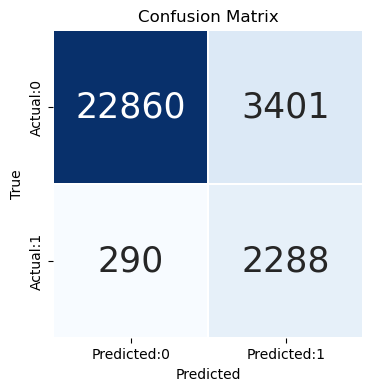

In [52]:
# Plot confusion matrix

cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap='Blues', cbar = False, linewidths = 0.1, annot_kws = {'size':25})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [53]:
rf = RandomForestClassifier()

In [54]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [55]:
y_pred = rf.predict(X_test)

In [56]:
# Evaluate the model
print("Model Accuracy: ", accuracy_score(y_test, y_pred)*100)
print(classification_report(y_test, y_pred))

Model Accuracy:  89.6112902666528
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     26261
           1       0.46      0.91      0.61      2578

    accuracy                           0.90     28839
   macro avg       0.72      0.90      0.78     28839
weighted avg       0.94      0.90      0.91     28839



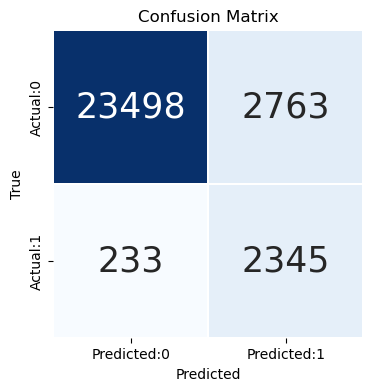

In [57]:
# Plot confusion matrix

cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap='Blues', cbar = False, linewidths = 0.1, annot_kws = {'size':25})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [58]:
#we can see the best we are getting from the RandomForestClassifer so let's hyperparameter tune it. 

In [59]:
# create a dictionary with hyperparameters and its values
# pass the criteria 'entropy' and 'gini' to the parameter, 'criterion' 
# pass a list of values to 'n_estimators' to build the different number of trees in the random forest
# pass a list of values to 'max_depth' that assigns maximum depth of the tree
# 'max_features' assigns maximum number of features to consider for the best split. We pass the string 'sqrt' and 'log2'
# 'sqrt' considers maximum number of features equal to the square root of total features
# 'log2' considers maximum number of features equal to the log of total features with base 2
# pass a list of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# pass a list of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# pass a list of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]
 
# instantiate the 'RandomForestClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
random_forest_classification = RandomForestClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the random forest classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

# use fit() to fit the model on the train set
rf_grid_model = rf_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 11, 'min_samples_leaf': 9, 'min_samples_split': 2, 'n_estimators': 30} 

